In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm import HMLSTMNetwork, plot_indicators, prepare_inputs, get_text, convert_to_batches
import tensorflow as tf

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [2]:
# simulate multiresolution data
num_signals = 300
signal_length = 400
x = np.linspace(0, 50 * np.pi, signal_length)
signals = [np.random.normal(0, .5, size=signal_length) +
           (2 * np.sin(.6 * x + np.random.random() * 10)) +
           (5 * np.sin(.1* x + np.random.random() * 10))
    for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

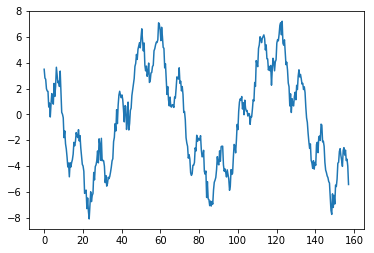

In [3]:
# example signal
plt.plot(x, signals[5]);

In [4]:
batches_in, batches_out = convert_to_batches(signals, batch_size=10)

In [5]:
tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=30,
                       embed_size=50, out_hidden_size=30, num_layers=2)

In [6]:
network.train(batches_in[:-1], batches_out[:-1], epochs=1, load_vars_from_disk=True,
              save_vars_to_disk=True, variable_path='./sinusoidal')

loading variables...
INFO:tensorflow:Restoring parameters from ./sinusoidal
Epoch 0
loss: 0.609522
loss: 0.620434
loss: 0.592323
loss: 0.599762
loss: 0.579407
loss: 0.610213
loss: 0.58442
loss: 0.598649
loss: 0.619533
loss: 0.574497
loss: 0.580029
loss: 0.57492
loss: 0.557369
loss: 0.576057
loss: 0.570223
loss: 0.571535
loss: 0.578142
loss: 0.586501
loss: 0.555371
loss: 0.553151
loss: 0.570141
loss: 0.559927
loss: 0.568402
loss: 0.538365
loss: 0.557872
loss: 0.550743
loss: 0.54899
loss: 0.522911
saving variables...


In [7]:
boundaries = network.predict_boundaries(batches_in[-1])
print(boundaries)

[[[ 0.  0.  0. ...,  1.  1.  1.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  1.  1.  1.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 1.  1.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 1.  1.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  1.  1.  1.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  1.  1.  1.]
  [ 0.  0.  0. ...,  0.  0.  0.]]]


In [9]:
predictions = network.predict(batches_in[-1])

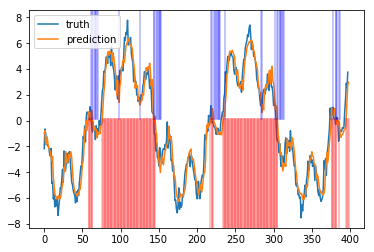

In [11]:
plot_indicators(batches_out[-1][0], predictions[0], indicators=boundaries[0]);

### Text classificaiton example

In [15]:
tf.reset_default_graph()
network = HMLSTMNetwork(output_size=27, input_size=27,
                        embed_size=2048, out_hidden_size=1024,
                        hidden_state_sizes=1024, 
                        task='classification')

In [16]:
batches_in, batches_out = prepare_inputs(batch_size=2, truncate_len=100, 
                                         step_size=2500, text_path='text8.txt',
                                         num_batches=6)

In [17]:
network.train(batches_in[:-1], batches_out[:-1], save_vars_to_disk=True, 
              load_vars_from_disk=True, variable_path='./text8')

predictions = network.predict(batches_in[-1], variable_path='./text8')
boundaries = network.predict_boundaries(batches_in[-1], variable_path='./text8')

loading variables...
INFO:tensorflow:Restoring parameters from ./text8
Epoch 0
loss: 2.57954


ValueError: bad axis2 argument to swapaxes

In [ ]:
print('predictions:', get_text(predictions[0]))
print('truth:', get_text(batches_out[-1][0]))